In [1]:
#SET 1
#Q1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data
data = {
    'Company': ['Allied Signal', 'Bankers Trust', 'General Mills', 'ITT Industries', 'J.P.Morgan & Co.',
                'Lehman Brothers', 'Marriott', 'MCI', 'Merrill Lynch', 'Microsoft', 'Morgan Stanley',
                'Sun Microsystems', 'Travelers', 'US Airways', 'Warner-Lambert'],
    'Measure X': [24.23, 25.53, 25.41, 24.14, 29.62, 28.25, 25.81, 24.39, 40.26, 32.95, 91.36, 25.99, 39.42, 26.71, 35.00]
}


In [3]:
# Create a DataFrame
df = pd.DataFrame(data)

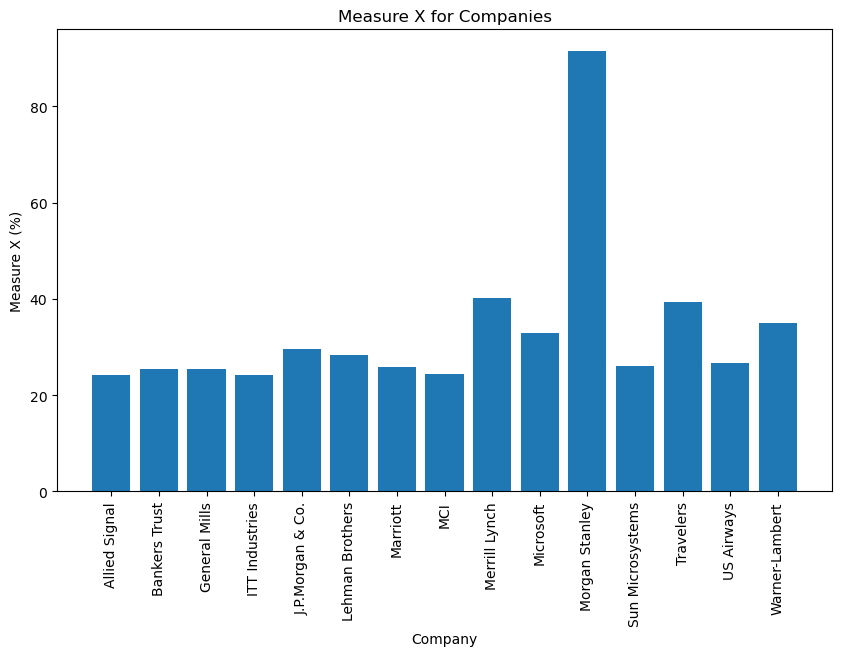

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Company'], df['Measure X'])
plt.xticks(rotation=90)
plt.title('Measure X for Companies')
plt.xlabel('Company')
plt.ylabel('Measure X (%)')
plt.show()


In [5]:
# Identify outliers
Q1 = df['Measure X'].quantile(0.25)
Q3 = df['Measure X'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Measure X'] < (Q1 - 1.5 * IQR)) | (df['Measure X'] > (Q3 + 1.5 * IQR))]
print('Outliers:')
print(outliers)

Outliers:
           Company  Measure X
10  Morgan Stanley      91.36


In [6]:
# Calculate mean, standard deviation, and variance
mean_X = np.mean(df['Measure X'])
std_X = np.std(df['Measure X'])
var_X = np.var(df['Measure X'])

In [7]:
print('\nStatistics:')
print(f'Mean (μ): {mean_X}')
print(f'Standard Deviation (σ): {std_X}')
print(f'Variance (σ^2): {var_X}')


Statistics:
Mean (μ): 33.27133333333333
Standard Deviation (σ): 16.370812590976932
Variance (σ^2): 268.00350488888887


In [ ]:
#SET 2

In [1]:
from scipy import stats
from scipy.stats import norm


In [2]:
#find Z scores at X = 60 ,work begins after 10 minutes of the dropoff, x = 50; z = (x - Mue)/ sigma)
Z = (50-45)/8
Z

0.625

In [3]:
#Find probability P(x>50) = 1-stats.norm.cdf(abs(z_score))
1-stats.norm.cdf(abs(0.625))


0.26598552904870054

In [1]:
#Q2
from scipy import stats
from scipy.stats import norm

In [2]:
#A. More employees at the processing center are older than 44 then between 38 and 44

#p(x>44); Employees older than 44yr of age
1 - stats.norm.cdf(44, loc=38, scale=6)

0.15865525393145707

In [3]:
#p(38<x<44); Employees between 38 to 44 yrs of age
stats.norm.cdf(44,38,6)- stats.norm.cdf(38,38,6)


0.3413447460685429

In [4]:
#B. A training program for employees under the age of 30 at the center would be expected to attract 36 employees
#p(x<30); Employees under 30 yrs of age
stats.norm.cdf(30,38,6)

0.09121121972586788

In [5]:
400*stats.norm.cdf(30,38,6)

36.484487890347154

In [ ]:
#A is False as the probability of p(x>44) is false 
#B is True as the probability of age of employees attracted towards training program is approx 36.48

In [ ]:
#Q3 Word document

In [ ]:
#Given 
mew =100
std = 20
# p(a<x<b)
#To Find = "Two values, a and b, symmetric about the mean , such that the probability of the random variable taking a value between them is 0.99"
#Solution " From the above details, we have to exclude .005% area from each left and right tails. Hence , we want to find out the .005th and .995th percentile Z score values"


In [23]:
#Q4
print("""The two values of a and b, symmentric about mean,
are such that the probability of the random variable taking a value between them is 0.99:""",
      np.round(stats.norm.interval(0.99, loc = 100, scale = 20),1))


The two values of a and b, symmentric about mean,
are such that the probability of the random variable taking a value between them is 0.99: [ 48.5 151.5]


In [24]:
#Q5
mean1 = 5
mean2 = 7
Mean = (mean1 + mean2) # 1USD = 45 rupees
print('The mean profit of both division: ',Mean, 'Million$')
print('The mean profit of both division: ',(Mean*45)/10, 'Crore Rupees')

The mean profit of both division:  12 Million$
The mean profit of both division:  54.0 Crore Rupees


In [34]:
# Combine standard deviation
std1 = 3**2
std2 = 4**2
std = np.sqrt(std1 + std2)
print('Std of both divisions:', std,'Million$')
print('Std of both divisions:', (std *45)/10, 'Crore Rupees')

Std of both divisions: 5.0 Million$
Std of both divisions: 22.5 Crore Rupees


In [35]:
#A. 
r1, r2 = np.round(stats.norm.interval(0.95, Mean, std),2)
print('Rupee Ranges from',r1,'to',r2, 'Million$ in Annual profit of the Company 95% of the time')
print('Rupee Ranges from',np.divide(np.multiply(r1,45),10),'to',np.divide(np.multiply(r2,45),10),'Crore Rupees in Annual profit of the Company 95% of the time')


Rupee Ranges from 2.2 to 21.8 Million$ in Annual profit of the Company 95% of the time
Rupee Ranges from 9.900000000000002 to 98.1 Crore Rupees in Annual profit of the Company 95% of the time


In [37]:
#B.
#z value = X_bar - mew/ std population
#for percentile, X_percentile = (Zvalue * Std pop) + Mew
z_05_ = stats.norm.ppf(0.05)
Fifth_percentile = (z_05_ *std) + Mean
print('The 5th percentile of profit fot the company is',np.round(Fifth_percentile,2),'Million$')
print('The 5th percentile of profit for the company is',np.round((Fifth_percentile*45)/10,),'Crore Rupees')

The 5th percentile of profit fot the company is 3.78 Million$
The 5th percentile of profit for the company is 17.0 Crore Rupees


In [40]:
#C.
#The probability of Division #1 making a loss
print('The probability of Division #1 making a loss is ',np.round((stats.norm.cdf(0,5,3))*100,2),'%')

#The probability of Division #2 making a loss
print('The Probability of Division #2 making a loss is',np.round((stats.norm.cdf(0,7,4))*100,2),'%')

Division_1 = (stats.norm.cdf(0,5,3))*100
Division_2 = (stats.norm.cdf(0,7,4))*100

if Division_1>Division_2:
    print('The Division 1 has a larger Probability of making a loss')
else:
        print('The Division 2 has a larger Probability of making a loss')




The probability of Division #1 making a loss is  4.78 %
The Probability of Division #2 making a loss is 4.01 %
The Division 1 has a larger Probability of making a loss


In [ ]:
# Set 2 Question no 5
